In [1]:
import pandas as pd
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
import numpy as np

# tf.debugging.set_log_device_placement(True)
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -q -o "/content/drive/MyDrive/00_Data_Science/09_rsna_atd/data.zip" -d "/content/09_rsna_atd"

In [8]:
data = '/content/09_rsna_atd/data/'

In [9]:
pic_paths = glob.glob(os.path.join(data, 'train_images', '*', '*', '*.png'))

In [10]:
df_data_label = pd.read_csv(os.path.join(data, 'train.csv'))

In [11]:
df_data_label

# model1: bowel, bowel_injury,
# model2: extra: extravasation_injury,
# model3: kidney: kidney_healthy	kidney_low	kidney_high
# model4: liver: liver_healthy	liver_low	liver_high
# model5: spleen: spleen_healthy	spleen_low	spleen_high

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,series_id,instance_number,injury_name,image_path,width,height
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,362,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
1,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,363,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
2,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,364,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
3,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,365,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
4,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,366,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13010,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,155,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
13011,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,156,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
13012,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,157,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
13013,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,158,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512


In [13]:
# data = '/content/drive/MyDrive/00_Data_Science/09_rsna_atd/data'
pic_path = glob.glob(os.path.join(data, 'train_images', '*', '*', '*.png'))
df_data_label = pd.read_csv(os.path.join(data, 'train.csv'))

df_data_label['image_path']= df_data_label['image_path'].str.replace("/kaggle/input/rsna-2023-abdominal-trauma-detection/", data, regex=False)
df_data_label['image_path']= df_data_label['image_path'].str.replace(".dcm", '.png', regex=False)

In [14]:
df_data_label['image_path'][0]

'/content/09_rsna_atd/data/train_images/10004/21057/362.png'

In [15]:
# df_data = df_data_label[['bowel_injury', 'image_path', 'extravasation_injury']].drop_duplicates()
df_data = df_data_label[['image_path',
                         'bowel_injury', 'extravasation_injury',
                         'kidney_healthy','kidney_low','kidney_high',
                         'liver_healthy', 'liver_low', 'liver_high',
                         'spleen_healthy', 'spleen_low', 'spleen_high'
                        ]].drop_duplicates()

In [ ]:
# df_data['bowel_injury']= df_data['bowel_injury'].astype(str)
# df_data['extravasation_injury']= df_data['extravasation_injury'].astype(str)
# df_data['kidney_healthy','kidney_low', 'kidney_high']

In [16]:
df_data['kidney_classes'] = tf.argmax(df_data[['kidney_healthy','kidney_low', 'kidney_high']], axis=1)
df_data['kidney_classes'] = df_data['kidney_classes'].map({0: "kidney_healthy",
                                                            1: "kidney_low",
                                                            2: "kidney_high"})
df_data['kidney_category'] = df_data[['kidney_healthy','kidney_low','kidney_high']].apply(lambda x: x.tolist(), axis=1)

In [17]:
df_data['liver_classes'] = tf.argmax(df_data[['liver_healthy', 'liver_low', 'liver_high']], axis=1)
df_data['liver_classes'] = df_data['liver_classes'].map({0: "liver_healthy",
                                                          1: "liver_low",
                                                          2: "liver_high"})
df_data['liver_category'] = df_data[['liver_healthy','liver_low','liver_high']].apply(lambda x: x.tolist(), axis=1)

In [18]:
df_data['spleen_classes'] = tf.argmax(df_data[['spleen_healthy', 'spleen_low', 'spleen_high']], axis=1)
df_data['spleen_classes'] = df_data['spleen_classes'].map({0: "spleen_healthy",
                                                            1: "spleen_low",
                                                            2: "spleen_high"})
# very interesting; when use multi-output, it has to be like this, but if we are using categorical; it is not like this
df_data['spleen_category'] = df_data[['spleen_healthy', 'spleen_low', 'spleen_high']].apply(lambda x: x.tolist(), axis=1)

In [19]:
df_data.head()

,image_path,bowel_injury,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,kidney_classes,kidney_category,liver_classes,liver_category,spleen_classes,spleen_category
0,/content/09_rsna_atd/data/train_images/10004/2...,0,1,0,1,0,1,0,0,0,0,1,kidney_low,"[0, 1, 0]",liver_healthy,"[1, 0, 0]",spleen_high,"[0, 0, 1]"
1,/content/09_rsna_atd/data/train_images/10004/2...,0,1,0,1,0,1,0,0,0,0,1,kidney_low,"[0, 1, 0]",liver_healthy,"[1, 0, 0]",spleen_high,"[0, 0, 1]"
2,/content/09_rsna_atd/data/train_images/10004/2...,0,1,0,1,0,1,0,0,0,0,1,kidney_low,"[0, 1, 0]",liver_healthy,"[1, 0, 0]",spleen_high,"[0, 0, 1]"
3,/content/09_rsna_atd/data/train_images/10004/2...,0,1,0,1,0,1,0,0,0,0,1,kidney_low,"[0, 1, 0]",liver_healthy,"[1, 0, 0]",spleen_high,"[0, 0, 1]"
4,/content/09_rsna_atd/data/train_images/10004/2...,0,1,0,1,0,1,0,0,0,0,1,kidney_low,"[0, 1, 0]",liver_healthy,"[1, 0, 0]",spleen_high,"[0, 0, 1]"


In [20]:
target_list_1 = ['bowel_injury', 'extravasation_injury', 'kidney_classes', 'liver_classes', 'spleen_classes']
target_list_2 = ['bowel_injury', 'extravasation_injury', 'kidney_category', 'liver_category', 'spleen_category']

In [21]:
def split_group(group, test_size=0.2):
    if len(group) == 1:
        #case one: condition when group has only 1 element.
        return (group, pd.DataFrame()) if np.random.rand() < test_size else (pd.DataFrame(), group)
    else:
        return train_test_split(group, test_size=test_size, random_state=42)

# Initialize the train and validation datasets
df_train = pd.DataFrame()
df_val = pd.DataFrame()

# Iterate through the groups and split them, handling single-sample groups
for _, group in df_data.groupby(target_list_1):
#     print(len(group))
    train_group, val_group = split_group(group)
    df_train = pd.concat([df_train, train_group], ignore_index=True)  # this is to keep adding more data to the dataframe
    df_val = pd.concat([df_val, val_group], ignore_index=True)   # this is to keep adding more data to the dataframe

In [22]:
# roughly same distribution
df_train.groupby(['kidney_classes'])['image_path'].count()/df_train.shape[0]

kidney_classes
kidney_healthy    0.866117
kidney_high       0.054465
kidney_low        0.079418
Name: image_path, dtype: float64

In [ ]:
# roughly same distribution
df_val.groupby(['kidney_classes'])['image_path'].count()/df_val.shape[0]

kidney_classes
kidney_healthy    0.864655
kidney_high       0.055172
kidney_low        0.080172
Name: image_path, dtype: float64

In [23]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                  )
train_generator = train_datagen.flow_from_dataframe(
    dataframe = df_train,
    directory=None,
    x_col='image_path',
    y_col = target_list_2,
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='multi_output',
    batch_size=32,
    shuffle=True,
    seed=1,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    interpolation='nearest',
    validate_filenames=True)

val_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe = df_val,
    directory=None,
    x_col='image_path',
    y_col = target_list_2,
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='multi_output',
    batch_size=32,
    shuffle=True,
    seed=1,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    interpolation='nearest',
    validate_filenames=True)

Found 9217 validated image filenames.
Found 2319 validated image filenames.


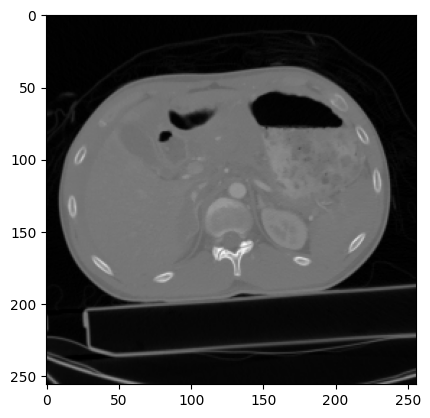

In [24]:
image = validation_generator.next()
plt.imshow(image[0][0])
plt.show()

# Inception Network: Transfer Learning

In [25]:
import urllib.request
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(256, 256, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(weights_file)
for layer in pre_trained_model.layers:
    layer.trainable = False

In [ ]:
# pre_trained_model.summary()

In [26]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 14, 14, 768)


In [27]:
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)

# Define 'necks' for each head
x_bowel = tf.keras.layers.Dense(32, activation='relu')(x)
x_extra = tf.keras.layers.Dense(32, activation='relu')(x)
x_kidney = tf.keras.layers.Dense(32, activation='relu')(x)
x_liver = tf.keras.layers.Dense(32, activation='relu')(x)
x_spleen = tf.keras.layers.Dense(32, activation='relu')(x)

# Define heads

y_bowel = tf.keras.layers.Dense(1, activation='sigmoid', name='bowel')(x_bowel)
y_extra = tf.keras.layers.Dense(1, activation='sigmoid', name='extra')(x_extra)
y_kidney = tf.keras.layers.Dense(3, activation='softmax', name='kidney')(x_kidney)
y_liver = tf.keras.layers.Dense(3, activation='softmax', name='liver')(x_liver)
y_spleen = tf.keras.layers.Dense(3, activation='softmax', name='spleen')(x_spleen)

model = Model(pre_trained_model.input, [y_bowel, y_extra, y_kidney, y_liver, y_spleen])


In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization[0][0

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
          # optimizer=RMSprop(learning_rate=0.001),  # 0.001 is the default optimizer
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])
history = model.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
289/289 [==============================] - 662s 2s/step - loss: 2.8264 - bowel_loss: 0.7163 - extra_loss: 0.6848 - kidney_loss: 0.3776 - liver_loss: 0.4771 - spleen_loss: 0.5707 - bowel_accuracy: 0.6471 - extra_accuracy: 0.7201 - kidney_accuracy: 0.8514 - liver_accuracy: 0.8187 - spleen_accuracy: 0.6969 - val_loss: 1.6165 - val_bowel_loss: 0.4293 - val_extra_loss: 0.3923 - val_kidney_loss: 0.2285 - val_liver_loss: 0.2427 - val_spleen_loss: 0.3237 - val_bowel_accuracy: 0.8129 - val_extra_accuracy: 0.7969 - val_kidney_accuracy: 0.8646 - val_liver_accuracy: 0.8404 - val_spleen_accuracy: 0.7585
Epoch 2/50
289/289 [==============================] - 663s 2s/step - loss: 1.6618 - bowel_loss: 0.4255 - extra_loss: 0.3912 - kidney_loss: 0.2401 - liver_loss: 0.2579 - spleen_loss: 0.3471 - bowel_accuracy: 0.8010 - extra_accuracy: 0.8175 - kidney_accuracy: 0.8721 - liver_accuracy: 0.8543 - spleen_accuracy: 0.7804 - val_loss: 1.2906 - val_bowel_loss: 0.3202 - val_extra_loss: 0.3112 - val_

In [ ]:
# model.save(os.path.join('/Users/ryansun/Desktop/DS/rsna_atd/models', 'model_3c_inception.keras'))
model.save(os.path.join('/content/drive/MyDrive/00_Data_Science/09_rsna_atd/models/', 'model_3c_inception.keras'))


In [ ]:
df_hist = pd.DataFrame(model.history.history)
df_hist.to_csv(os.path.join('/content/drive/MyDrive/00_Data_Science/09_rsna_atd/models/', 'model_3c_inception_history.csv'), index=True)

In [ ]:
model_loaded = tf.keras.models.load_model(os.path.join('/Users/ryansun/Desktop/DS/rsna_atd/models', 'model_3c_inception.keras'))

AttributeError: 'Adam' object has no attribute 'build'

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0
